<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
local_csv = '../data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [3]:
# A:
nhl = pd.read_csv(local_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [40]:
# A:
nhl.dtypes

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [31]:
nhl2 = nhl.drop('Rank', axis = 1)
feature_cols = nhl2.columns

In [32]:
# A:
y = nhl.Rank

### 4. What is the baseline accuracy?

In [33]:
# A:
nhl.Rank.value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [43]:
# A:
features = ['PTS', 'CA', 'GF', 'GA']
X = nhl[features]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [44]:
# A:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

y_pred_class = knn.predict(X)
print((metrics.accuracy_score(y, y_pred_class)))

1.0


### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [45]:
# A:
train_test_split?

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [46]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.5, random_state=99)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.7111111111111111


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [50]:
# A:
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.3111111111111111


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

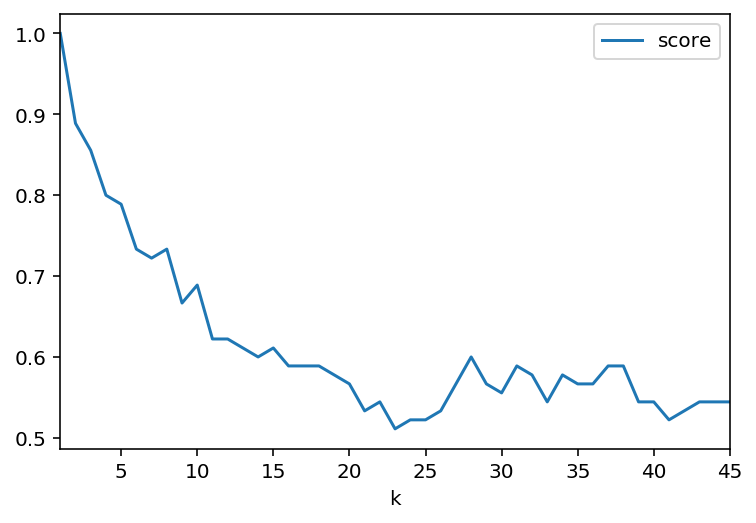

In [52]:
# A:
scores = []
for k in range(1,46):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [13]:
# A:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.5)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

scores = []
for k in range(1,46):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [53]:
# A:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [62]:
y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

In [63]:
testing_accuracy

0.8